In [1]:
%matplotlib inline
import chgpath
from bayes import *

In [2]:
def get_series_for_df_row(row):
    """gets series for specific row in the PiR dataset"""
    r = showcase.loc[showcase['Name'] == row].T
    r_data = [int(x) for x in r.values[1:]]
    r_series = pd.Series(r_data)
    return r_series

# sequence to use throughout this notebook
xs = np.linspace(0, 75000, 101)

In [3]:
# read in the csv data
showcase = pd.read_csv('show11.csv')
showcase.rename(index=str, columns={'Unnamed: 0':'Name'}, inplace=True)
showcase

,Name,Sep. 19,Sep. 20,Sep. 21,Sep. 22,Sep. 23,Sep. 26,Sep. 27,Sep. 28,Sep. 29,...,Jun. 11,Jun. 12,Jun. 13,Jun. 14,Jun. 15,Jun. 18,Jun. 19,Jul. 4,Aug. 17,Sep. 4
0,NaN,5631K,5632K,5633K,5634K,5635K,5641K,5642K,5643K,5644K,...,6012K,6011K,6013K,6014K,6015K,6024K,5685K,6021K,6022K,6023K
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Showcase 1,50969,21901,32815,44432,24273,30554,20963,28941,25851,...,27690,29426,21711,29307,25263,26993,29390,34920,30323,46638
3,Showcase 2,45429,34061,53186,31428,22320,24337,41373,45437,41125,...,41765,34304,26277,26617,32646,33337,26314,31278,31285,42319
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bid 1,42000,14000,32000,27000,18750,27222,25000,35000,22500,...,23000,27000,19000,25300,25500,41000,23052,27800,27000,29900
6,Bid 2,34000,59900,45000,38000,23000,18525,32000,45000,32000,...,36000,30000,24750,28000,26800,26888,16000,30022,21000,33000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Difference 1,8969,7901,815,17432,5523,3332,-4037,-6059,3351,...,4690,2426,2711,4007,-237,-14007,6338,7120,3323,16738
9,Difference 2,11429,-25839,8186,-6572,-680,5812,9373,437,9125,...,5765,4304,1527,-1383,5846,6449,10314,1256,10285,9319


# Checking the Data
PDFs of the showcases needs to be compared with the text to ensure the data is being interpreted correctly.

Text(0.5,1,'Showcase PDF')

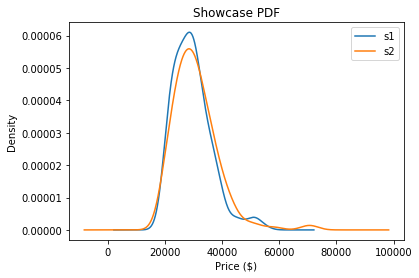

In [4]:
# reading in data - showcases - verification
s1 = get_series_for_df_row('Showcase 1')
s2 = get_series_for_df_row('Showcase 2')
s1.plot.kde(legend=True, label='s1')
s2_plot = s2.plot.kde(legend=True, label='s2')
s2_plot.set_xlabel('Price ($)')
s2_plot.set_title('Showcase PDF')

Text(0.5,1,'Showcase PDF')

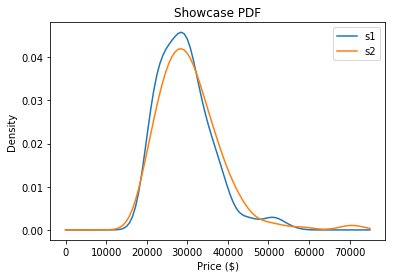

In [5]:
# create pdf of showcase data (note: pandas did this with kde above)
pdf1 = Pdf(s1)
pdf2 = Pdf(s2)
s1_pmf_from_pdf = pdf1.to_pmf(xs)
s2_pmf_from_pdf = pdf2.to_pmf(xs)
s1_pmf_from_pdf.normalize()
s2_pmf_from_pdf.normalize()
s1_pmf_from_pdf.plot(legend=True, label='s1')
s2_plot = s2_pmf_from_pdf.plot(legend=True, label='s2')
s2_plot.set_xlabel('Price ($)')
s2_plot.set_ylabel('Density')
s2_plot.set_title('Showcase PDF')

Text(0.5,1,'Bid PDF')

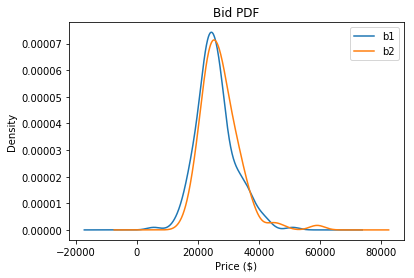

In [6]:
# reading in data - bids - verification
b1 = get_series_for_df_row('Bid 1')
b2 = get_series_for_df_row('Bid 2')
b1.plot.kde(legend=True, label='b1')
b2_plot = b2.plot.kde(legend=True, label='b2')
b2_plot.set_xlabel('Price ($)')
b2_plot.set_title('Bid PDF')

Text(0.5,1,'Diff PDF')

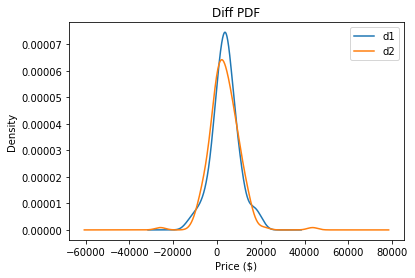

In [7]:
# reading in data - bids - verification
d1 = get_series_for_df_row('Difference 1')
d2 = get_series_for_df_row('Difference 2')
d1.plot.kde(legend=True, label='d1')
d2_plot = d2.plot.kde(legend=True, label='d2')
d2_plot.set_xlabel('Price ($)')
d2_plot.set_title('Diff PDF')

Text(0.5,1,'Diff CDF')

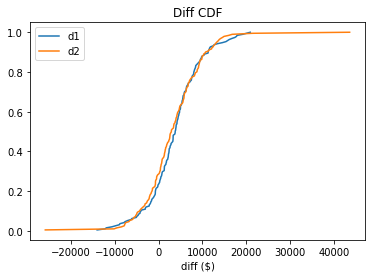

In [8]:
# get cdf of diff data
d1_cdf = get_cdf_from_seq(d1.values)
d2_cdf = get_cdf_from_seq(d2.values)
d1_cdf.plot(legend=True, label='d1')
d2_cdf_plot = d2_cdf.plot(legend=True, label='d2')
d2_cdf_plot.set_xlabel('diff ($)')
d2_cdf_plot.set_title('Diff CDF')

In [9]:
# chance of overbidding for each showcase
print('showcase 1 chance of overbid',d1_cdf.prob(0))
print('showcase 2 chance of overbid',d2_cdf.prob(0))

showcase 1 chance of overbid 0.23036649214659702
showcase 2 chance of overbid 0.2827225130890054


In [10]:
import optimalbid as ob

In [11]:
# create two players for each set of showcase data
p1 = ob.Player(s1.values, b1.values, d1.values, xs)
p2 = ob.Player(s2.values, b1.values, d2.values, xs)

In [12]:
# compute optimal bid based on players' guess
print(p1.optimal_bid(20000, p2))
print(p2.optimal_bid(40000, p1))

(21000.0, 16010.147162551626)
(31500.0, 18881.096311342855)


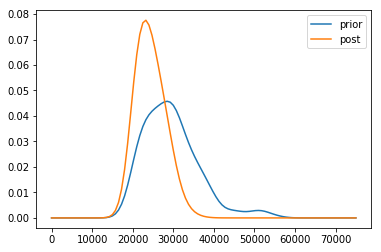

In [13]:
# prior vs posterior for player 1 after bid of $20,000
p1.prior.normalize()
p1.prior.plot(legend=True, label='prior')
p1.posterior.plot(legend=True, label='post')

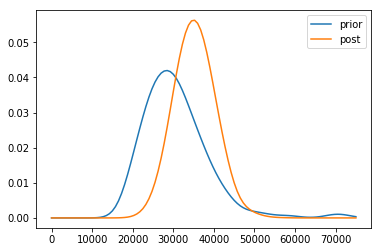

In [14]:
# prior vs posterior for player 2 after bid of $40,000
p2.prior.normalize()
p2.prior.plot(legend=True, label='prior')
p2.posterior.plot(legend=True, label='post')

Text(0,0.5,'expected gain ($)')

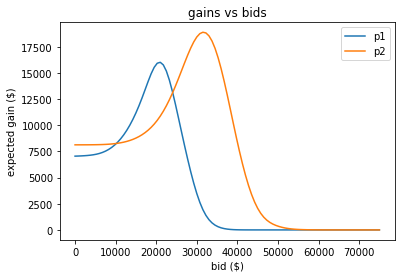

In [15]:
# visualizing results of bids based on guess of each player
p1.bid_gain.plot(legend=True, label='p1')
p2_bg_plot = p2.bid_gain.plot(legend=True, label='p2')
p2_bg_plot.set_title('gains vs bids')
p2_bg_plot.set_xlabel('bid ($)')
p2_bg_plot.set_ylabel('expected gain ($)')